In [1]:
!pip install tabula-py
!pip install jpype1

**Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabula
from tabula.io import read_pdf
from tabula.io import convert_into
import warnings
warnings.filterwarnings('ignore')

**Load Excel dataset**

In [3]:
loan_data_excel = pd.read_excel('DEEPAK Loan Data.xlsx')

**Display first few rows of the Excel dataset**

In [4]:
loan_data_excel.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


**Extract data from PDF**

In [5]:
loan_data_pdf = read_pdf('DEEPAK_Loans_Database_Table.pdf', pages='all')

In [6]:
tabula.convert_into("DEEPAK_Loans_Database_Table.pdf", "deepak_pdf_file.csv", output_format="csv", pages='all')

In [7]:
deepak_pdf = pd.read_csv('deepak_pdf_file.csv')

In [8]:
deepak_pdf.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


**Combine Excel and PDF data (after converting the PDF into a DataFrame)**

In [9]:
loan_data_combined = pd.concat([loan_data_excel, deepak_pdf], ignore_index=True)

**Check the shape of the combined data**

In [10]:
loan_data_combined.shape

(645, 13)

**Check for duplicates**

In [11]:
loan_data_combined.drop_duplicates(inplace=True)

**Check for missing values**

In [12]:
print(loan_data_combined.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**1. Descriptive Statistics**

In [13]:
loan_data_combined.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,1997.070093,1.182243,0.651090,0.735202,0.783489,0.129283,5370.386293,1609.445047,148.230530,334.439252,0.777259,1.959502
std,554.745996,0.386346,0.476997,1.003103,0.412188,0.335775,6035.008001,2872.763920,86.301415,62.817346,0.416411,0.788912
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1560.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.250000,333.000000,1.000000,1.000000
50%,1963.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1221.000000,128.000000,360.000000,1.000000,2.000000
75%,2448.750000,1.000000,1.000000,1.000000,1.000000,0.000000,5741.000000,2305.000000,168.000000,360.000000,1.000000,3.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


**2. Calculate total amount loaned**

In [14]:
total_loaned = loan_data_combined['LoanAmount'].sum()
print(f"Total amount loaned: {total_loaned}")

Total amount loaned: 95164


**3. Calculate average amount loaned**

In [15]:
average_loaned = loan_data_combined['LoanAmount'].mean()
print(f"Average amount loaned: {average_loaned}")

Average amount loaned: 148.23052959501558


**4. Calculate average loan term**

In [16]:
average_term = loan_data_combined['Loan_Amount_Term'].mean()
print(f"Average loan term: {average_term} months")

Average loan term: 334.4392523364486 months


**5. Group data by Loan_Status and Gender**

In [17]:
loan_status_gender = loan_data_combined.groupby(['Loan_Status', 'Gender']).size().unstack()

**Plotting the results**

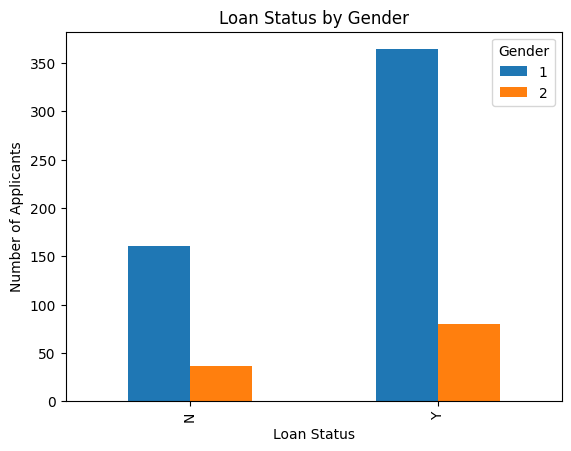

In [18]:
loan_status_gender.plot(kind='bar', stacked=False)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Status")
plt.ylabel("Number of Applicants")
plt.show()

**6. Find max and min loan amounts**

In [19]:
max_loan = loan_data_combined['LoanAmount'].max()
min_loan = loan_data_combined['LoanAmount'].min()
print(f"Maximum loan amount: {max_loan}, Minimum loan amount: {min_loan}")

Maximum loan amount: 700, Minimum loan amount: 9


**Plotting max and min loan amounts**

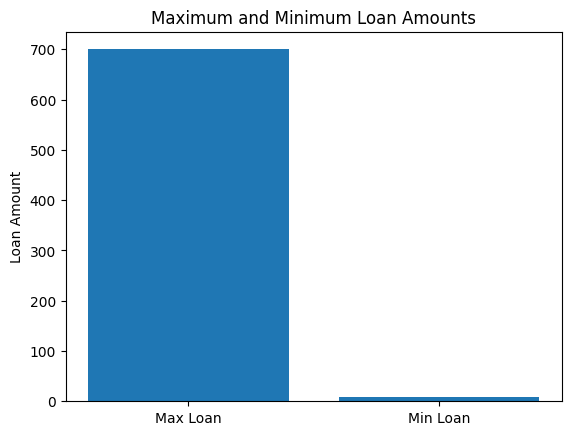

In [20]:
plt.bar(['Max Loan', 'Min Loan'], [max_loan, min_loan])
plt.title("Maximum and Minimum Loan Amounts")
plt.ylabel("Loan Amount")
plt.show()

**7. Percentage of self-employed people whose loans were approved**

In [21]:
approved_loans = loan_data_combined[loan_data_combined['Loan_Status'] == 'Y']
self_employed_approved = approved_loans[approved_loans['Self_Employed'] == 'Yes']

**Percentage calculation**

In [22]:
percentage_self_employed_approved = (len(self_employed_approved) / len(approved_loans)) * 100
print(f"Percentage of self-employed with approved loans: {percentage_self_employed_approved:.2f}%")

Percentage of self-employed with approved loans: 0.00%


**Plotting the results**

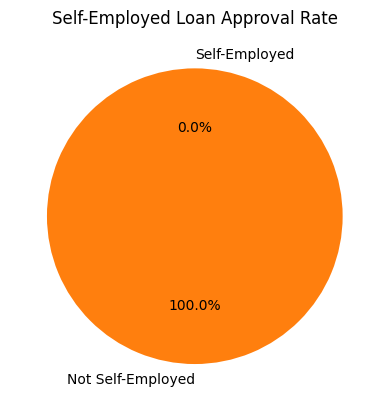

In [23]:
labels = ['Self-Employed', 'Not Self-Employed']
sizes = [len(self_employed_approved), len(approved_loans) - len(self_employed_approved)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Self-Employed Loan Approval Rate")
plt.show()

**8. Income distribution of main applicants**

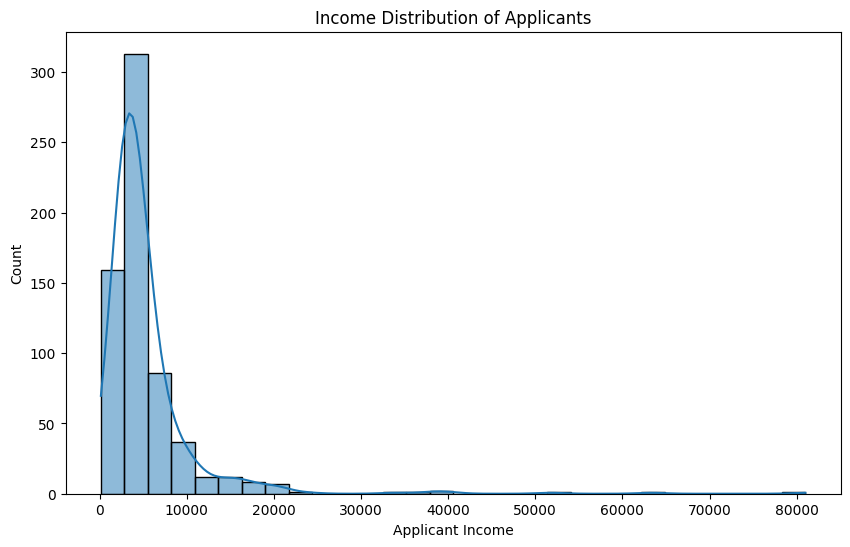

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_combined['ApplicantIncome'], bins=30, kde=True)
plt.title('Income Distribution of Applicants')
plt.xlabel('Applicant Income')
plt.show()

**Average and standard deviation of income**

In [25]:
avg_income = loan_data_combined['ApplicantIncome'].mean()
std_income = loan_data_combined['ApplicantIncome'].std()
print(f"Average Income: {avg_income}, Standard Deviation of Income: {std_income}")

Average Income: 5370.386292834891, Standard Deviation of Income: 6035.008000801144


**9. Top 10 applicants by loan amount**

In [26]:
top_10_loans = loan_data_combined.nlargest(10, 'LoanAmount')
print(top_10_loans[['Loan_ID', 'ApplicantIncome', 'LoanAmount']])

     Loan_ID  ApplicantIncome  LoanAmount
418     1585            51763         700
377     1469            20166         650
194     2813            19484         600
402     1536            39999         600
616     2191            19730         570
120     2547            18333         500
237     2959            12000         496
424     1610             5516         495
580     2101            63337         490
139     2624            20833         480


**10. Property Area Distribution**

In [27]:
property_distribution = loan_data_combined['Property_Area'].value_counts()

**Plotting the distribution**

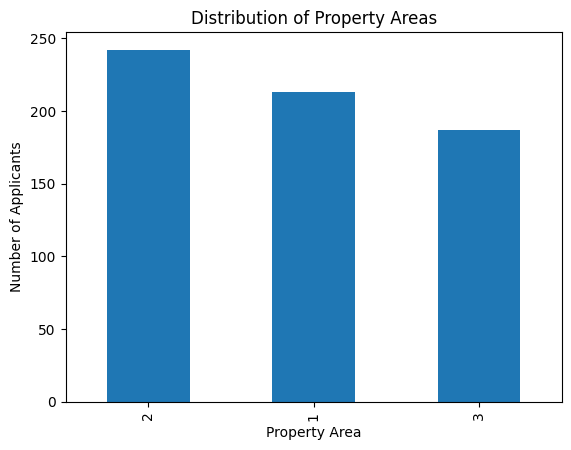

In [28]:
property_distribution.plot(kind='bar')
plt.title("Distribution of Property Areas")
plt.xlabel("Property Area")
plt.ylabel("Number of Applicants")
plt.show()